<h1 style="font-style:bold; margin-left:20%; font-size: 40px;font-family:Yu Mincho Demibold"> MOVIE INDUSTRY ANALYSIS</h1>

<div ><img style="width:80%;" src="https://mfers.co/wp-content/uploads/2018/12/140716-Z-RG517-002.jpg"></div>

<h2 style ="font-style:bold; font-size:35px;text-decoration:underline;font-family:Yu Mincho Demibold">Introduction</h2>

<hr style="width:50%;height:1px;">

<h1 style=" font-size:33px;font-family:Yu Mincho Demibold"> About : </h1>



<p style="font-size:20px">
This data was scraped from IMDB. There are 6820 movies in the dataset (220 movies per year, 1980-2016). Each movie has the following attributes:
</p>
<ul style="font-size:17px">
 <li>budget: the budget of a movie. Some movies don't have this, so it appears as 0</li>

 <li>company: the production company</li>

 <li>country: country of origin</li>

 <li>director: the director</li>

<li>genre: main genre of the movie.</li>

<li>gross: revenue of the movie</li>

  <li>name: name of the movie</li>

 <li>rating: rating of the movie (R, PG, etc.)</li>

 <li>released: release date (YYYY-MM-DD)</li>

 <li>runtime: duration of the movie</li>

 <li>score: IMDb user rating</li>

 <li>votes: number of user votes</li>

 <li>star: main actor/actress</li>

 <li>writer: writer of the movie</li>

 <li>year: year of release</li>
</ul>

<hr style="width:50%;height:1px;">

<h2 style="margin-left:50px;font-size:40px;font-family:Yu Mincho Demibold;color:teal">Basic Questions</h2>

<ul style="font-size:17px">
    <li> What has happened during these four decades of movie production?</li>
    <li> What factors has greatly impacted the movie industry?</li>
    <li> What are the leading factors currently?</li>
    <span style="color:teal">and more...</span>
</ul>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np

import matplotlib.ticker as ticker
import matplotlib.patches as mpatches

matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

%matplotlib inline

sns.set_style('darkgrid')

In [2]:
gf = pd.read_csv('movies.csv')
gf.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


<h1 style=" font-size:23px;font-family:Yu Mincho Demibold"> Cleaning : </h1>

In [3]:
df = gf.dropna(thresh=14)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7478 entries, 0 to 7659
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7478 non-null   object 
 1   rating    7467 non-null   object 
 2   genre     7478 non-null   object 
 3   year      7478 non-null   int64  
 4   released  7478 non-null   object 
 5   score     7478 non-null   float64
 6   votes     7478 non-null   float64
 7   director  7478 non-null   object 
 8   writer    7478 non-null   object 
 9   star      7478 non-null   object 
 10  country   7478 non-null   object 
 11  budget    5487 non-null   float64
 12  gross     7426 non-null   float64
 13  company   7476 non-null   object 
 14  runtime   7477 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 934.8+ KB


In [13]:
def all_cat_percent(catego,num):
    totals = df[catego].value_counts().sum()
    the_values = df[catego].value_counts().head(num).values
    the_keys = df[catego].value_counts().head(num).keys()

    for the_key,the_value in zip(the_keys,the_values):
        the_percent = (the_value/totals)*100
        print(the_key,":",the_percent)
        

In [14]:
df['genre'].value_counts().head(5)
genre_plot = df['genre'].value_counts().reset_index().head(10)
genre_plot

,index,genre
0,Comedy,2195
1,Action,1677
2,Drama,1451
3,Crime,542
4,Biography,433
5,Adventure,421
6,Animation,333
7,Horror,316
8,Fantasy,43
9,Mystery,20


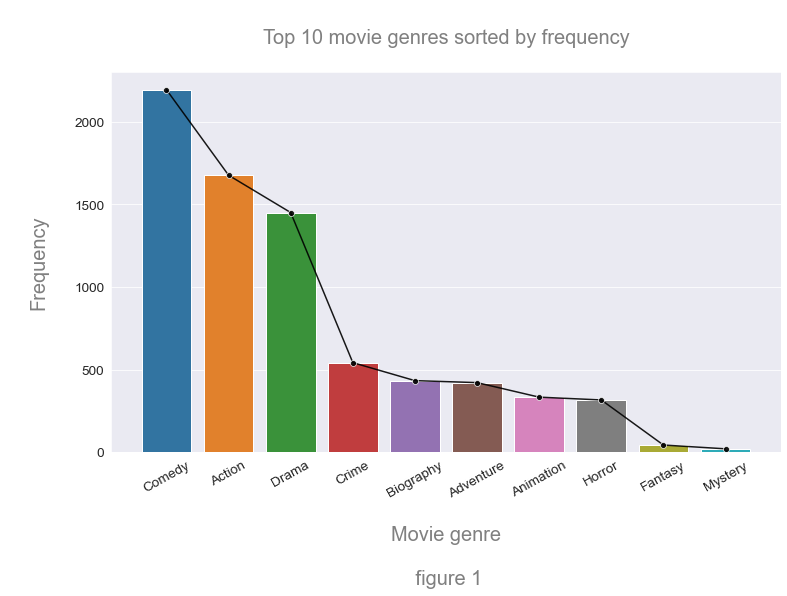

In [21]:
plt.figure(figsize=(12,7));
ax=sns.barplot(x=genre_plot['index'], y=genre_plot['genre'],);
sns.lineplot(data = genre_plot, marker='o', x='index', y='genre', color = 'black', alpha = .9);

ax.tick_params(axis='y', which='major', labelsize=13.6);
ax.tick_params(axis='x', which='major', labelsize=13.6, rotation=29);

plt.title('\nTop 10 movie genres sorted by frequency\n', size=20, color='grey');

ax.set_xlabel('\nMovie genre\n\n figure 1', fontsize=20, color='grey');
ax.set_ylabel('\nFrequency\n ', fontsize=20, color='grey');

In [7]:
all_cat_percent("genre",10)

Comedy : 29.352768119818133
Action : 22.42578229473121
Drama : 19.403583845948113
Crime : 7.247927253276278
Biography : 5.790318266916287
Adventure : 5.6298475528216105
Animation : 4.453062316127307
Horror : 4.22572880449318
Fantasy : 0.5750200588392618
Mystery : 0.2674511901577962


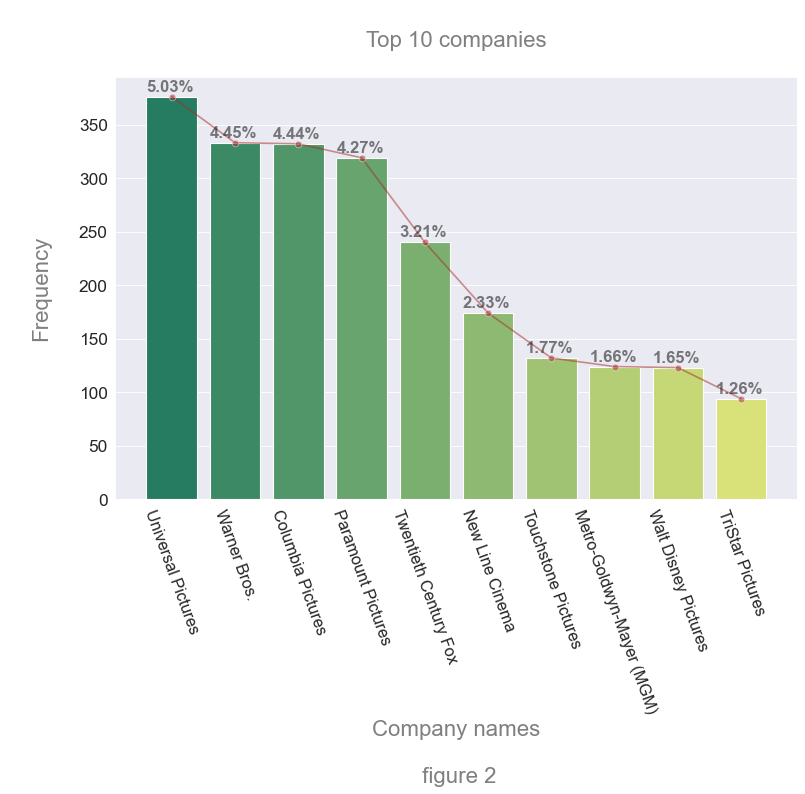

In [23]:
company_sum = df['company'].value_counts().sum()
df['company'].value_counts().head(5)
company_plot = df['company'].value_counts().reset_index().head(10)

fig, ax = plt.subplots(figsize = (11,7), dpi = 80)

ax=sns.barplot(x=company_plot['index'], y=company_plot['company'], palette='summer');
sns.lineplot(data = company_plot, marker='o', x='index', y='company', color = 'brown', alpha = .5);

ax.tick_params(axis='y', which='major', labelsize=15.6);
ax.tick_params(axis='x', which='major', labelsize=14.6, rotation=-70);

plt.title('\nTop 10 companies\n', size=20, color='grey');

total = company_plot.shape[0]
for i in ax.patches:
    ax.text(i.get_x()+0.0, i.get_height()+5, \
            str(round((i.get_height()/company_sum)*100, 2))+'%', fontsize=15,weight='bold',
                color='black', alpha=0.5)

ax.set_xlabel('Company names\n \n figure 2', fontsize=20, color='grey');
ax.set_ylabel('\nFrequency\n', fontsize=20, color='grey');

In [9]:
company_plot = df['company'].value_counts().reset_index().head(10)
company_plot

,index,company
0,Universal Pictures,376
1,Warner Bros.,333
2,Columbia Pictures,332
3,Paramount Pictures,319
4,Twentieth Century Fox,240
5,New Line Cinema,174
6,Touchstone Pictures,132
7,Metro-Goldwyn-Mayer (MGM),124
8,Walt Disney Pictures,123
9,TriStar Pictures,94


<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=15uX4fnuDMuki2xAnjK8wv-ifJhAkBtJ2" align="left" hspace="10px" vspace="0px"></p>
<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:'Times New Roman';font-size:30px;font-style: italic;color:  teal">Insights:</li>
</ul>

<div class="alert alert-info" role="alert">
<ul style="list-style-type:none;font-family:Yu Mincho Demibold;font-size:20px;color:  black">
<li> *  From figure 1, we see the dominant movie genres were found to be <span style="font-weight: bold; color:black;">Comedy(29.4%), Action(22.4%) and Drama(19.4%)</span>.
<br><br>
  <li> * From the figure 2, we can see the dominant movie companies within this period, we found  <span style="font-weight: bold; color:black;">Universal Pictures(5.03%), Warner Bros.(4.45%) and Columbia pictures(4.44%)</span>, to be the top 3.
        
</ul> 
</div>

<hr style="width:50%;height:1px;">

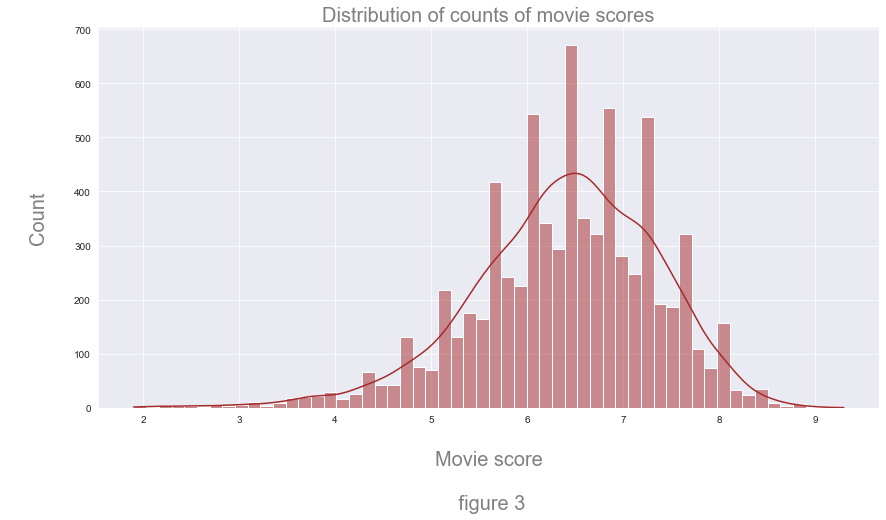

In [24]:
plt.figure(figsize=(14,7));
plt.title("Distribution of counts of movie scores", size=20, color='grey')
ax = sns.histplot(df.score, kde = True, color ='brown');

ax.set_xlabel('\nMovie score\n \n figure 3', fontsize=20, color='grey');
ax.set_ylabel('\nCount\n', fontsize=20, color='grey');

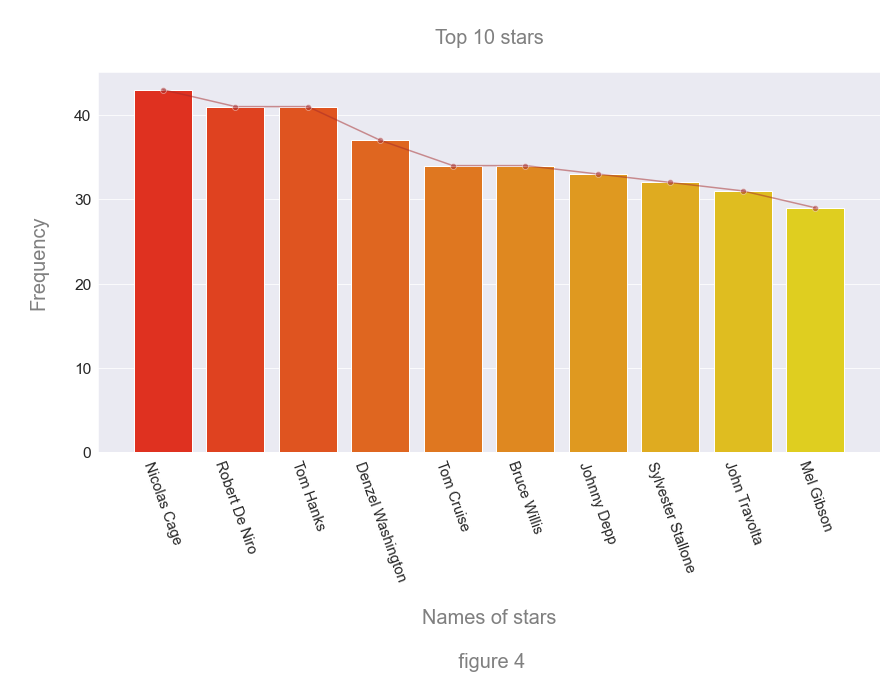

In [26]:
star_sum= df['star'].value_counts().sum()
df['star'].value_counts().head(5)
star_df = df['star'].value_counts().reset_index().head(10)

plt.figure(figsize=(14,7));
ax=sns.barplot(y=star_df['star'], x=star_df['index'], palette='autumn');
sns.lineplot(data = star_df, marker='o', x='index', y='star', color = 'brown', alpha = .5);

ax.tick_params(axis='y', which='major', labelsize=15.6);
ax.tick_params(axis='x', which='major', labelsize=14.6, rotation=-70);

plt.title('\nTop 10 stars\n', size=20, color='grey');

ax.set_xlabel('\nNames of stars\n \n figure 4', fontsize=20, color='grey');
ax.set_ylabel('\nFrequency\n', fontsize=20, color='grey');

In [35]:
df['star'].value_counts().head(10)

Nicolas Cage          43
Robert De Niro        41
Tom Hanks             41
Denzel Washington     37
Tom Cruise            34
Bruce Willis          34
Johnny Depp           33
Sylvester Stallone    32
John Travolta         31
Mel Gibson            29
Name: star, dtype: int64

In [5]:
cage_df= df[df['star']=='Nicolas Cage']
cage_avg = cage_df['score'].mean()

niro_df= df[df['star']=='Robert De Niro']
niro = niro_df['score'].mean()

hanks_df= df[df['star']=='Tom Hanks']
hanks = hanks_df['score'].mean()

denz_df= df[df['star']=='Denzel Washington']
denz = denz_df['score'].mean()

tom_df= df[df['star']=='Tom Cruise']
tom = tom_df['score'].mean()

print("Nicolas Cage has an average score of", cage_avg)
print("Robert De Niro has an average score of", niro)
print("Tom Hanks has an average score of", hanks)
print("Denzel Washington has an average score of", denz)
print("Tom Cruise has an average score of", tom)

Nicolas Cage has an average score of 6.167441860465117
Robert De Niro Cage has an average score of 6.71951219512195
Tom Hanks has an average score of 6.995121951219511
Denzel Washington has an average score of 6.908108108108108
Tom Cruise has an average score of 6.85


In [14]:
# star_df = df['star'].value_counts().reset_index().head(10)
# star_df

rating_sum = df['rating'].value_counts().sum()
df['rating'].value_counts().head(10)
rating_df = df['rating'].value_counts().reset_index().head(10)

director_sum = df['director'].value_counts().sum()
df['director'].value_counts().head(10)
dir_df = df['director'].value_counts().reset_index().head(10)

star_sum = df['star'].value_counts().sum()
df['star'].value_counts().head(10)
star_df = df['star'].value_counts().reset_index().head(10)

country_sum = df['country'].value_counts().sum()
df['country'].value_counts().head(10)
country_df = df['country'].value_counts().reset_index().head(10)

writer_sum = df['writer'].value_counts().sum()
df['writer'].value_counts().head(10)
writer_df = df['writer'].value_counts().reset_index().head(10)

score_sum = df['score'].value_counts().sum()
df['score'].value_counts().head(10)
score_df = df['score'].value_counts().reset_index().head(10)

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=15uX4fnuDMuki2xAnjK8wv-ifJhAkBtJ2" align="left" hspace="10px" vspace="0px"></p>
<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:'Times New Roman';font-size:30px;font-style: italic;color:  teal">Insights:</li>
</ul>

<div class="alert alert-info" role="alert">
<ul style="list-style-type:none;font-family:Yu Mincho Demibold;font-size:20px;color:  black">
<li> * We find that the counts of the movie scores were <span style="font-weight: bold; color:black;">normally distributed</span> from figure 3.</li>
<br>
 <li> * from figure 3, we see that movie scores are dense in the range of scores <span style="font-weight: bold; color:black;">5-8</span>.</li>
    <br>
   <li> * From figure 4, we find the top three(3) movie stars to be <span style="font-weight: bold; color:black;">Nicolas Cage(43), Robert De Niro(41), Tom Hanks(41)</span>.</li>
    <br
         <li> * From the top five(5) movie stars, we find the top scoring movie stars to be <span style="font-weight: bold; color:black;">Tom Hanks (average score = 7.0), Denzel Washington (average score = 6.9), Tom Cruise (average score = 6.85)</span>. </li>
</ul> 
</div>

<hr style="width:50%;height:1px;">

In [32]:
df['rating'].value_counts()

R            3639
PG-13        2097
PG           1231
Not Rated     262
G             152
Unrated        46
NC-17          23
TV-MA           9
X               3
TV-PG           3
Approved        1
TV-14           1
Name: rating, dtype: int64

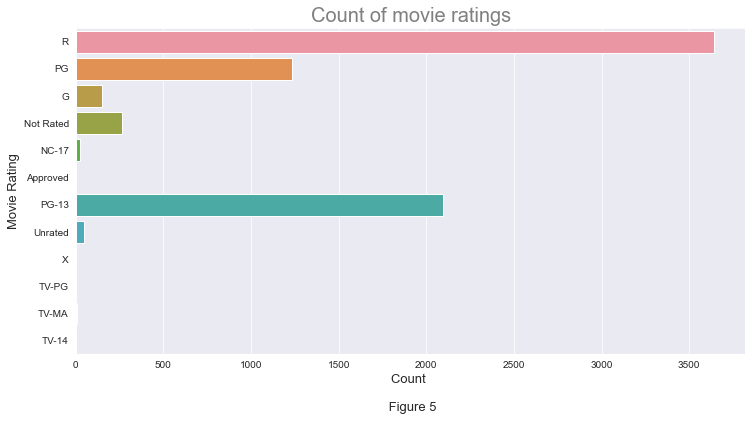

In [12]:
plt.figure(figsize=(12,6));
plt.title("Count of movie ratings", size=20, color='grey')
sns.countplot(y=df['rating']);
plt.xlabel('Count \n \n Figure 5',size = 13);
plt.ylabel('Movie Rating',size = 13);



In [33]:
all_cat_percent("rating",13)

R : 48.734431498593814
PG-13 : 28.08356769787063
PG : 16.48587116646578
Not Rated : 3.508771929824561
G : 2.035623409669211
Unrated : 0.6160439266104192
NC-17 : 0.3080219633052096
TV-MA : 0.12053033346725592
X : 0.040176777822418644
TV-PG : 0.040176777822418644
Approved : 0.013392259274139548
TV-14 : 0.013392259274139548


In [15]:
# def avg_score(cat,the_range,):
#     our_range = df[cat].unique()[range(0,the_range)]
#     for i in our_range:
#         gf = df[df[cat]=='i']
#         score_avg = gf['score'].sum()
#         print(i,':',score_avg)
        
# avg_score('country',5)

United Kingdom : 0.0
United States : 0.0
South Africa : 0.0
West Germany : 0.0
Canada : 0.0


<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=15uX4fnuDMuki2xAnjK8wv-ifJhAkBtJ2" align="left" hspace="10px" vspace="0px"></p>
<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:'Times New Roman';font-size:30px;font-style: italic;color:  teal">Insights:</li>
</ul>

<div class="alert alert-info" role="alert">
<ul style="list-style-type:none;font-family:Yu Mincho Demibold;font-size:20px;color:  black">
<li> *  From figure 5, we find the top 3 movie ratings(using the sum of movies in each category) to be<span style="font-weight: bold; color:black;">R (3639), PG-13 (2097) and PG (1231)</span>, and their percentages to be <span style="font-weight: bold; color:black;">48.7%, 28.1% and 16.5%</span> respectively.
<br><br>  
</ul> 
</div>

<hr style="width:50%;height:1px;">

In [140]:
# def average_score(crime):
#     score_df = df[df['star']==crime]
#     avg_score = score_df['score'].mean()
#     return(avg_score)
# average_score('Denzel Washington')

6.908108108108108

<h1 style=" font-size:33px;font-family:Yu Mincho Demibold;color:teal"> We will now try to calculate correlation: </h1>

<ul style="font-size:17px">
    <li>Does the budget affect gross? </li>
    <li>Does the star/director/writer/company name affect the overall score? </li>
    <li> Does the country affect the rating? </li>
    <li> Does the genre and year of release affect the score and gross?</li>
    <li> Does the runtime affect the score?</li>
    <span style="color:teal">and more...</span>
</ul>

<hr style="width:25%;height:1px;">

In [13]:
df.corr(method='pearson')

,year,score,votes,budget,gross,runtime
year,1.000000,0.097952,0.220935,0.331618,0.258882,0.115460
score,0.097952,1.000000,0.414423,0.075888,0.187840,0.400132
votes,0.220935,0.414423,1.000000,0.442091,0.631153,0.310226
budget,0.331618,0.075888,0.442091,1.000000,0.740378,0.320064
gross,0.258882,0.187840,0.631153,0.740378,1.000000,0.245001
runtime,0.115460,0.400132,0.310226,0.320064,0.245001,1.000000


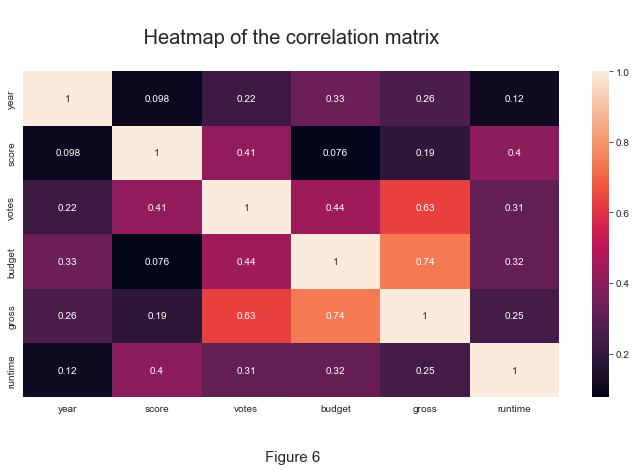

In [36]:
plt.figure(figsize=(12,6));
corr_df = df.corr(method='pearson') #pearson,kendall,spearman
sns.heatmap(corr_df,annot=True);
plt.xlabel(' \n \n Figure 6',size = 15);
plt.title('\n Heatmap of the correlation matrix \n', size = 20);

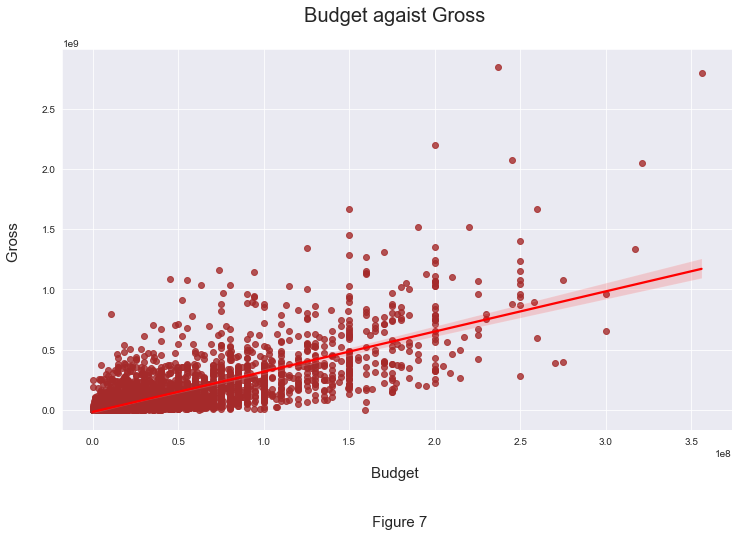

In [37]:
plt.figure(figsize=(12,7))
sns.regplot(x = df['budget'], y = df['gross'],scatter_kws = {"color":"brown"}, line_kws={"color":"red"});
plt.title('Budget agaist Gross \n', size = 20);
plt.xlabel('\nBudget \n \n \n Figure 7', size = 15);
plt.ylabel('Gross \n ', size = 15);

In [29]:
df_numerized = df.copy()
for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized.head(5)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,6430,6,6,1980,1664,8.4,927000.0,2498,3892,992,54,19000000.0,46998772.0,2219,146.0
1,5427,6,1,1980,1455,5.8,65000.0,2194,1581,310,55,4500000.0,58853106.0,699,104.0
2,5007,4,0,1980,1728,8.7,1200000.0,1072,2492,1662,55,18000000.0,538375067.0,1469,124.0
3,279,4,4,1980,1455,7.7,221000.0,1258,1942,2139,55,3500000.0,83453539.0,1727,88.0
4,1002,6,4,1980,1504,7.3,108000.0,1018,504,392,55,6000000.0,39846344.0,1694,98.0


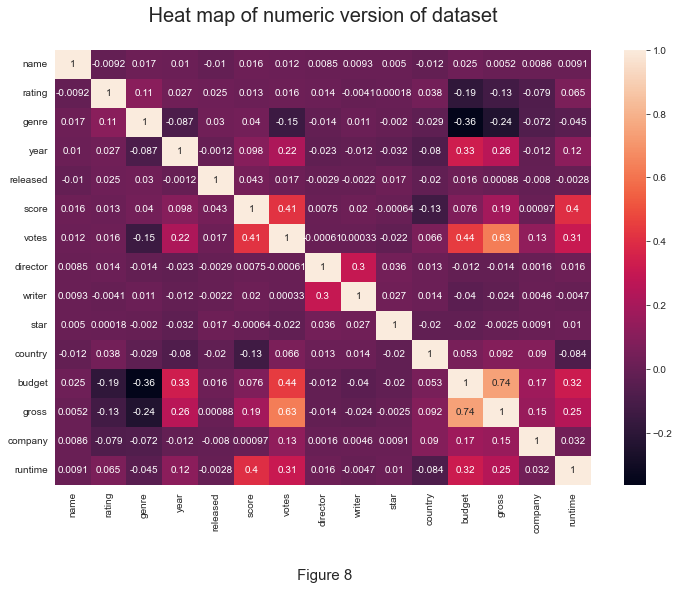

In [42]:
plt.figure(figsize=(12,8))
df_n = df_numerized.corr(method='pearson') #pearson,kendall,spearman
sns.heatmap(df_n,annot=True);
plt.xlabel(' \n \n Figure 8',size = 15);
plt.title(' Heat map of numeric version of dataset \n', size = 20);

In [45]:
kf = df.groupby('genre')[['score','gross','budget']].sum()
ksf = kf.sort_values('gross', ascending= False).head(10).reset_index()
ksf.head(3)

,genre,score,gross,budget
0,Action,10412.9,2.429992e+11,8.288671e+10
1,Comedy,13599.1,9.715738e+10,3.413528e+10
2,Animation,2253.6,7.989781e+10,2.114407e+10


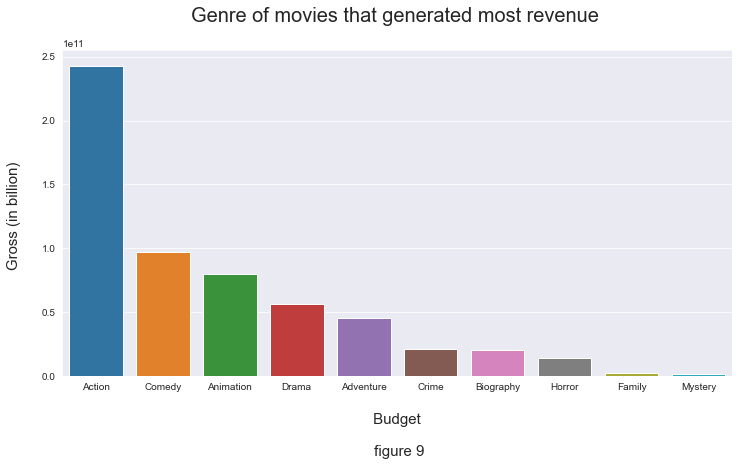

In [52]:
plt.figure(figsize=(12,6));
ax= sns.barplot(x=ksf['genre'], y=ksf['gross'],);
plt.title('Genre of movies that generated most revenue \n', size = 20);
plt.xlabel('\n Budget \n \n figure 9', size = 15);
plt.ylabel('Gross (in billion) \n', size = 15);

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=15uX4fnuDMuki2xAnjK8wv-ifJhAkBtJ2" align="left" hspace="10px" vspace="0px"></p>
<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:'Times New Roman';font-size:30px;font-style: italic;color:  teal">Insights:</li>
</ul>

<div class="alert alert-info" role="alert">
<ul style="list-style-type:none;font-family:Yu Mincho Demibold;font-size:20px;color:  black">
<li> *  From the heatmap of the correlation matrix (figure 6), we find that Budget and Gross are highly correlated. We can then say that increase(or decrease) in budget, led to increase(or decrease) in Gross.</li>
    <br>
    <li> * Figure 7 shows a regplot of budget against gross which displays the correlation between the two variables.</li>
    <br>
    <li>  * We categorized the non-numeric columns in the dataset, and represented them by codes, making it possible to create a heatmap. we find from figure 8: the most and least correlated among columns. </li>
    <br>
    <li> * figure 9 displays genre of movies that generated most revenue with this period. We find that the movie genre <span style="font-weight: bold; color:black;">Action</span> generated more revenue
 
</ul> 
</div>

<hr style="width:50%;height:1px;">

<h1 style=" font-size:35px; text-decoration:underline;"> Conclusion </h1>

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=14dpaeXX-ajsM8quwe3dCCdQdrdvf29iI" align="left" hspace="20px" vspace="20px" width="45" height="60" ></p>
<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:'Times New Roman';font-size:30px;font-style: italic;color:  teal">All Insights:</li>
</ul>

<div class="alert alert-info" role="alert">
<ul style="list-style-type:none;font-family:Yu Mincho Demibold;font-size:20px;color:  black">
<li> 1.  From figure 1, we see the dominant movie genres were found to be <span style="font-weight: bold; color:black;">Comedy(29.4%), Action(22.4%) and Drama(19.4%)</span>.
<br><br>
  <li> 2. From the figure 2, we can see the dominant movie companies within this period, we found  <span style="font-weight: bold; color:black;">Universal Pictures(5.03%), Warner Bros.(4.45%) and Columbia pictures(4.44%)</span>, to be the top 3.
<br>
      
<li> 3. We find that the counts of the movie scores were <span style="font-weight: bold; color:black;">normally distributed</span> from figure 3.</li>
<br>
 <li> 4. from figure 3, we see that movie scores are dense in the range of scores <span style="font-weight: bold; color:black;">5-8</span>.</li>
    <br>
   <li> 5. From figure 4, we find the top three(3) movie stars to be <span style="font-weight: bold; color:black;">Nicolas Cage(43), Robert De Niro(41), Tom Hanks(41)</span>.</li>
    <br
 <li> 6. From the top five(5) movie stars, we find the top scoring movie stars to be <span style="font-weight: bold; color:black;">Tom Hanks (average score = 7.0), Denzel Washington (average score = 6.9), Tom Cruise (average score = 6.85)</span>. </li> <br>
<br> 
<li> 7.  From figure 5, we find the top 3 movie ratings(using the sum of movies in each category) to be<span style="font-weight: bold; color:black;">R (3639), PG-13 (2097) and PG (1231)</span>, and their percentages to be <span style="font-weight: bold; color:black;">48.7%, 28.1% and 16.5%</span> respectively.</li> <br>
 
<li> 8.  From the heatmap of the correlation matrix (figure 6), we find that Budget and Gross are highly correlated. We can then say that increase(or decrease) in budget, led to increase(or decrease) in Gross.</li>
    <br>
    <li> 9. Figure 7 shows a regplot of budget against gross which displays the correlation between the two variables.</li>
    <br>
    <li>  10. We categorized the non-numeric columns in the dataset, and represented them by codes, making it possible to create a heatmap. we find from figure 8: the most and least correlated among columns. </li>
    <br>
    <li> 11. figure 9 displays genre of movies that generated most revenue with this period. We find that the movie genre <span style="font-weight: bold; color:black;">Action</span> generated more revenue.
<br>
</ul>
</div>

<h1 style=" font-size:30px;"> References </h1>

- `Stackoverflow`: https://stackoverflow.com/questions/68870547/date-and-time-conversion-in-python-pandas
- `opendatasets` Python library: https://github.com/JovianML/opendatasets
- `Alex the Analyst ` Github portfolio project: https://github.com/AlexTheAnalyst/PortfolioProjects/blob/main/Movie%20Portfolio%20Project.ipynb
- `Pandas` user guide: https://pandas.pydata.org/docs/user_guide/index.html
- `Matplotlib` user guide: https://matplotlib.org/3.3.1/users/index.html
- `Seaborn` user guide & tutorial: https://seaborn.pydata.org/tutorial.html

<h1 style=" font-size:30px;"> Future work</h1>

<p style="font-size:15px">
    
 - `There's still much insight that lies untapped within this dataset, and for sake of this particular project, we'll be stopping here. And hope to continue probing this dataset for further insights in the future.`
</p>